In [1]:
import matplotlib.pyplot as plt
import numpy as np
import operator
import time
import pandas as pd
import scipy.stats as st
from scipy.integrate import quad
from sortedcontainers import SortedDict
import staircase as sc
from numba import vectorize
from HotStepper.Basis import Basis
from HotStepper.Step import Step
from HotStepper.Steps import Steps
from HotStepper.Steps import Analysis


c:\python38\lib\site-packages\cupy\_environment.py:207: ResourceWarning: unclosed file <_io.TextIOWrapper name='c:\\python38\\lib\\site-packages\\cupy\\.data\\_wheel.json' mode='r' encoding='cp1252'>
  _preload_config = json.load(open(config_path))


In [ ]:
df = pd.read_csv(r"data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)

df.enter = df.enter.apply(pd.Timestamp)
df.leave = df.leave.apply(pd.Timestamp)

vsteps = Steps.stepify(df,'enter','leave')


In [ ]:
tbase = Basis(Basis.tanh,52416)

p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(minutes=10)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=3,figsize=(20,16))

tic = time.perf_counter()
#vsteps.rebase(tbase)
ax[0].step(p,vsteps.smooth_step_function(p,0.8))
toc = time.perf_counter()
print(f'Run time: {toc - tic} seconds')

dfd = vsteps.to_dataframe()
dfd['cumsum'] = dfd.step.cumsum()
queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)
queue.plot(ax[1])

dfd.ts = dfd.ts.apply(pd.Timestamp)
dfdg = dfd.sort_values('ts').groupby('ts')['cumsum'].max()
dfdg.plot(ax=ax[2],drawstyle="steps")
print(len(p))


In [6]:
#[2, 3, 1, 2, 1, 2]
#[3.75, 5.6, 6, 7.2, 9, 12]

s1 = sc.Stairs()
s1.layer(4)
s1.layer(4)
s1.layer(5,6)
s1.layer(7)
s1.layer(12)
s1.layer(9,value=-1)

ss3 = Steps().add([Step(4-0.000001,weight=0),Step(4),Step(4),Step(5,6),Step(7),Step(12),Step(9,weight=-1)])

#s = Step(4,weight=2)
#tbase = Basis(Basis.arctan,1)
#ss3.rebase(tbase)
#print(s.integrate(10,0))
print(ss3.mean())
#print(list(ss3._cummulative.keys()))

print(s1.mean())

2.375
2.375


In [ ]:
s2 = sc.Stairs().layer(2,4,2)
s3 = sc.Stairs().layer(3,5,2)
(s2/2).plot()

In [ ]:
# widths = np.subtract(cumulative.keys()[2:], cumulative.keys()[1:-1])
# heights = cumulative.values()[1:-1]
# area = np.multiply(widths, heights).sum()

# dd = vsteps._steps
# dcs = vsteps._cumsum
# ddk = [d.start_ts for d in dd]
# #ddv = [d. for d in dd]

# delta = np.subtract(ddk[2:],ddk[1:-1])

# #print(delta)
# #print(dcs)
# np.dot(dcs[1:-1],delta)/3600

vsteps.percentile(35)

In [ ]:
queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)
queue.percentile(35)

c:\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


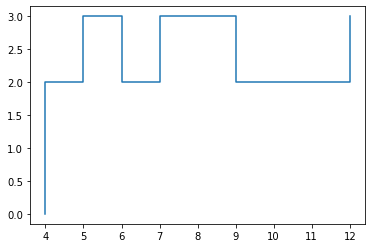

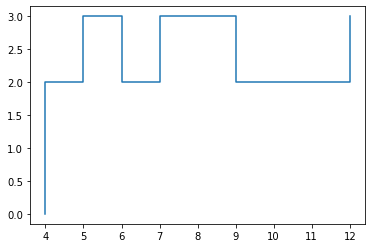

In [9]:
# dic  =ss3.to_dict()
# data = {'x': dic.keys(),'y': dic.values()}
# df = pd.DataFrame.from_dict(data)
# df.set_index('x',inplace=True)
# ax = df.plot(drawstyle="steps-post",legend=False)
# p = np.arange(4,12,0.01)
# ax.step(p,ss3.smooth_step_function(p,0.0005))

ss3.plot()

s1.plot()